In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat) 

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [7]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_mat_rf)

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [10]:
def knn_classifier(X_train, y_train, X_test, k):

    y_pred = []

    for x_test in X_test:
        distances = np.linalg.norm(X_train - x_test, axis=1)
        nearest_neighbors_indices = np.argsort(distances)[:k]
        nearest_neighbors_labels = y_train[nearest_neighbors_indices]

        predicted_label = np.bincount(nearest_neighbors_labels).argmax()
        y_pred.append(predicted_label)

    return np.array(y_pred)

In [11]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

best_k = k_values[np.argmax(accuracies)]
best_accuracy = accuracies[np.argmax(accuracies)]

Best k: 1
Best Accuracy: 1.0


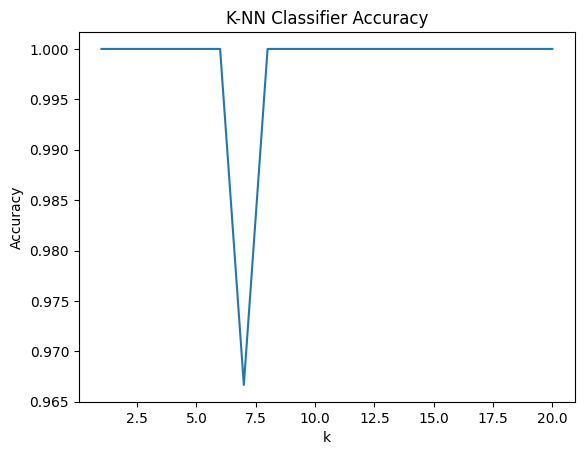

In [16]:
print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K-NN Classifier Accuracy")
plt.show()